In [1]:
import os,sys,inspect
currentdir = os.getcwd()
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir)
import random

import vrpSolver
# %matplotlib notebook

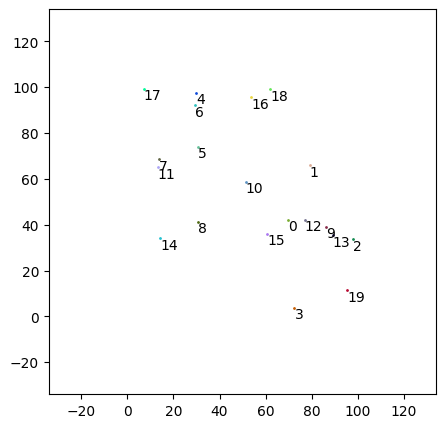

In [2]:
# Generate and plot instance
nodes = vrpSolver.rndNodes(
    N = 20,
    distr = 'UniformSquareXY',
    xRange = (0, 100),
    yRange = (0, 100)
)
fig, ax = vrpSolver.plotNodes(
    nodes = nodes, 
    boundingBox = (-20, 120, -20, 120)
)

In [3]:
for n in nodes:
    nodes[n]['price'] = 100 * random.random()

In [4]:
# DFJ with lazy cut
DFJ_Lazy = vrpSolver.solveTSP(
    nodes = nodes, 
    edges = 'Euclidean',
    algo = 'IP',
    fml = 'DFJ_Lazy',
    solver = 'Gurobi',
    detailsFlag = False,
    outputFlag = False)

In [5]:
DFJ_Lazy

{'ofv': 392.5504141447766,
 'seq': [0,
  12,
  9,
  13,
  2,
  19,
  3,
  15,
  10,
  8,
  14,
  11,
  7,
  5,
  17,
  6,
  4,
  16,
  18,
  1,
  0],
 'gap': 0,
 'solType': 'IP_Optimal',
 'lowerBound': 392.5504141447766,
 'upperBound': 392.5504141447766,
 'runtime': 0.015802383422851562}

In [8]:
OP = vrpSolver.solveOP(
    nodes = nodes,
    startID = 4,
    endID = 2,
    maxBudget = 200,
    algo = "IP",
    solver = "Gurobi",
    fml = 'MTZ'
)

In [9]:
OP

{'ofv': 614.7438362578722,
 'dist': 199.4510328086297,
 'seq': [4, 6, 7, 8, 15, 0, 12, 3, 19, 2],
 'gap': 0,
 'solType': 'IP_Optimal',
 'lowerBound': 614.7438362578722,
 'upperBound': 614.7438362578722,
 'runtime': 0.3419475555419922}

In [10]:
fig, ax = vrpSolver.plotNodeSeq(
    fig = fig,
    ax = ax,
    nodes = nodes,
    nodeSeq = OP['seq'])

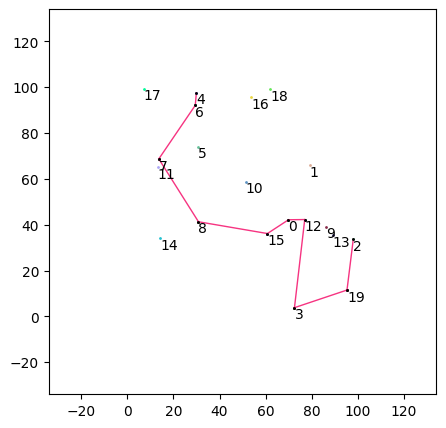

In [11]:
fig

In [12]:
OP = vrpSolver.solveOP(
    nodes = nodes,
    startID = 4,
    endID = 2,
    maxBudget = 200,
    algo = "IP",
    solver = "Gurobi",
    fml = 'DFJ_Lazy'
)

In [13]:
OP

{'ofv': 614.7438362578722,
 'dist': 199.4510328086297,
 'seq': [4, 6, 7, 8, 15, 0, 12, 3, 19, 2],
 'gap': 0,
 'solType': 'IP_Optimal',
 'lowerBound': 614.7438362578722,
 'upperBound': 614.7438362578722,
 'runtime': 0.21051979064941406}

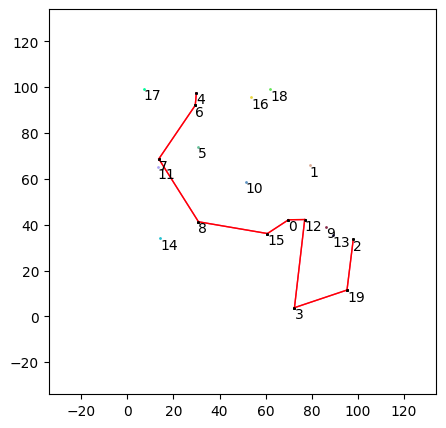

In [14]:
fig, ax = vrpSolver.plotNodeSeq(
    fig = fig,
    ax = ax,
    nodes = nodes,
    nodeSeq = OP['seq'],
    lineColor = 'red')
fig

In [15]:
for i in range(100):
    nodes = vrpSolver.rndNodes(
        N = 20,
        distr = 'UniformSquareXY',
        xRange = (0, 100),
        yRange = (0, 100)
    )
    for n in nodes:
        nodes[n]['price'] = 100 * random.random()
        
    vrpSolver.saveDictionary(nodes, "OP_20_ID_%s" % i)
        
    OPMTZ = vrpSolver.solveOP(
        nodes = nodes,
        startID = 1,
        endID = 2,
        maxBudget = 200,
        algo = "IP",
        solver = "Gurobi",
        fml = 'MTZ'
    )
    OPDFJ = vrpSolver.solveOP(
        nodes = nodes,
        startID = 1,
        endID = 2,
        maxBudget = 200,
        algo = "IP",
        solver = "Gurobi",
        fml = 'DFJ_Lazy'
    )
    
    print(vrpSolver.hyphenStr("ID: " + str(i)))
    print("ofv", OPMTZ['ofv'], "dist: ", OPMTZ['dist'])
    print(OPMTZ['seq'])
    print("runtime: ", OPMTZ['runtime'])
    
    print("ofv", OPDFJ['ofv'], "dist: ", OPDFJ['dist'])
    print(OPDFJ['seq'])
    print("runtime: ", OPDFJ['runtime'])
    print("\n")

---------------------------------- ID: 0 ----------------------------------
ofv 634.148592861622 dist:  199.24414422363031
[1, 16, 10, 13, 12, 0, 18, 6, 5, 4, 3, 7, 2]
runtime:  1.3624897003173828
ofv 634.148592861622 dist:  196.21120545382746
[1, 16, 10, 13, 12, 6, 5, 4, 3, 7, 18, 0, 2]
runtime:  0.30242919921875


---------------------------------- ID: 1 ----------------------------------
ofv 705.7417138523621 dist:  196.94951201579602
[1, 6, 10, 15, 19, 3, 17, 14, 16, 8, 12, 13, 2]
runtime:  0.6397609710693359
ofv 705.7417138523621 dist:  196.94951201579602
[1, 6, 10, 15, 19, 3, 17, 14, 16, 8, 12, 13, 2]
runtime:  0.1550579071044922


---------------------------------- ID: 2 ----------------------------------
ofv 602.8940458331333 dist:  198.89259099353885
[1, 6, 13, 7, 3, 19, 0, 8, 4, 12, 14, 10, 2]
runtime:  0.22381973266601562
ofv 602.8940458331333 dist:  198.89259099353885
[1, 6, 13, 7, 3, 19, 0, 8, 4, 12, 14, 10, 2]
runtime:  0.13791656494140625


------------------------------

--------------------------------- ID: 26 ----------------------------------
ofv 796.5550743656501 dist:  196.88292036256485
[1, 6, 5, 8, 19, 7, 9, 4, 17, 11, 13, 2]
runtime:  0.9620609283447266
ofv 796.5550743656502 dist:  196.88292036256485
[1, 6, 5, 8, 19, 7, 9, 4, 17, 11, 13, 2]
runtime:  0.17267227172851562


--------------------------------- ID: 27 ----------------------------------
ofv 676.5735547140687 dist:  199.42846347186028
[1, 15, 11, 19, 18, 3, 12, 16, 13, 0, 2]
runtime:  4.8260650634765625
ofv 676.5735547140687 dist:  199.42846347186028
[1, 15, 11, 19, 18, 3, 12, 16, 13, 0, 2]
runtime:  2.0891952514648438


--------------------------------- ID: 28 ----------------------------------
ofv 756.0623763155846 dist:  198.30085013312367
[1, 9, 3, 4, 6, 7, 19, 17, 10, 18, 16, 5, 2]
runtime:  2.0219898223876953
ofv 756.0623763155845 dist:  192.94531663662227
[1, 18, 9, 10, 17, 19, 7, 6, 4, 3, 16, 5, 2]
runtime:  0.31359291076660156


--------------------------------- ID: 29 -------

--------------------------------- ID: 52 ----------------------------------
ofv 730.1639746373248 dist:  199.9128846638341
[1, 5, 18, 4, 17, 0, 7, 13, 16, 8, 2]
runtime:  0.9243831634521484
ofv 730.1639746373248 dist:  197.1516803702224
[1, 17, 4, 18, 5, 0, 7, 13, 16, 8, 2]
runtime:  0.32968902587890625


--------------------------------- ID: 53 ----------------------------------
ofv 421.05533573156794 dist:  197.47412824076554
[1, 11, 13, 17, 9, 10, 3, 5, 0, 6, 19, 16, 2]
runtime:  7.619537353515625
ofv 421.05533573156794 dist:  197.47412824076554
[1, 11, 13, 17, 9, 10, 3, 5, 0, 6, 19, 16, 2]
runtime:  6.690881729125977


--------------------------------- ID: 54 ----------------------------------
ofv 798.4212784080152 dist:  194.89455756939685
[1, 0, 13, 7, 11, 6, 4, 5, 10, 19, 17, 18, 3, 12, 2]
runtime:  0.7307567596435547
ofv 798.4212784080152 dist:  194.89455756939685
[1, 0, 13, 7, 11, 6, 4, 5, 10, 19, 17, 18, 3, 12, 2]
runtime:  0.12190628051757812


------------------------------

--------------------------------- ID: 78 ----------------------------------
ofv 606.2217336773463 dist:  199.68152187851138
[1, 17, 0, 5, 12, 19, 7, 10, 15, 6, 9, 16, 2]
runtime:  1.8618392944335938
ofv 606.2217089264147 dist:  196.446119608909
[1, 17, 0, 5, 12, 19, 7, 10, 15, 9, 6, 16, 2]
runtime:  1.0051441192626953


--------------------------------- ID: 79 ----------------------------------
ofv 574.166882431227 dist:  198.8167706191024
[1, 0, 19, 3, 13, 5, 18, 15, 14, 7, 9, 2]
runtime:  1.4742298126220703
ofv 574.166882431227 dist:  198.8167706191024
[1, 0, 19, 3, 13, 5, 18, 15, 14, 7, 9, 2]
runtime:  0.4832439422607422


--------------------------------- ID: 80 ----------------------------------
ofv 757.2437493996973 dist:  197.09519412758215
[1, 12, 11, 8, 3, 18, 0, 14, 19, 9, 10, 4, 2]
runtime:  0.6500148773193359
ofv 757.2437493996973 dist:  197.4725930284418
[1, 8, 11, 12, 3, 18, 0, 14, 19, 9, 10, 4, 2]
runtime:  0.3636035919189453


--------------------------------- ID: 81 --

In [3]:
nodes = vrpSolver.loadDictionary("OP_20_ID_4")

In [3]:
OPMTZ = vrpSolver.solveOP(
    nodes = nodes,
    startID = 1,
    endID = 2,
    maxBudget = 200,
    algo = "IP",
    solver = "Gurobi",
    fml = 'MTZ'
)

In [4]:
OPDFJ = vrpSolver.solveOP(
    nodes = nodes,
    startID = 1,
    endID = 2,
    maxBudget = 200,
    algo = "IP",
    solver = "Gurobi",
    fml = 'DFJ_Lazy'
)

In [5]:
OPDFJ

{'ofv': 591.6382223328002,
 'dist': 199.21537058856288,
 'seq': [1, 18, 6, 17, 16, 3, 14, 9, 2],
 'gap': 0,
 'solType': 'IP_Optimal',
 'lowerBound': 591.6382223328002,
 'upperBound': 591.6382223328002,
 'runtime': 0.9023914337158203}

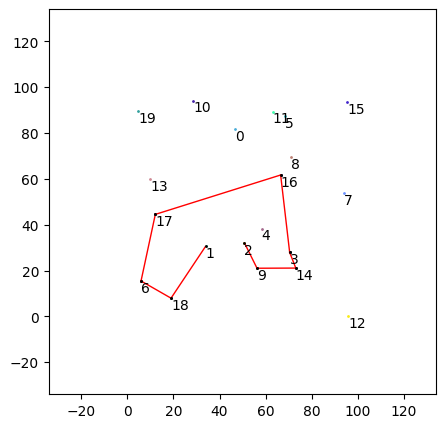

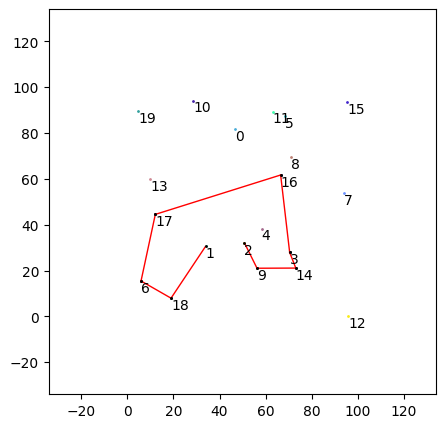

In [6]:
fig, ax = vrpSolver.plotNodes(
    nodes = nodes, 
    boundingBox = (-20, 120, -20, 120)
)
fig, ax = vrpSolver.plotNodeSeq(
    fig = fig,
    ax = ax,
    nodes = nodes,
    nodeSeq = OPDFJ['seq'],
    lineColor = 'red')
fig